In [1]:
import vectorbt as vbt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import random


from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

return_history = []
benchmark_return_history = []
idx = []
strategy = (5, 15, 'AAPL')


year = 10
init_start = datetime.now()-timedelta(days=365*year)
for i in range(year):
    
    start = init_start+timedelta(days=365*i)
    end = init_start+timedelta(days=365*(i+1))
    price = vbt.YFData.download(['META','AAPL'], start=start, end=end).get('Close')


    windows = np.arange(5,50,5)
    fast_ma, slow_ma = vbt.MA.run_combs(price, window=windows, r=2, short_names=['fast', 'slow'])
    entries = fast_ma.ma_crossed_above(slow_ma)
    exits = fast_ma.ma_crossed_below(slow_ma)
    # group_by = ['first', 'first', 'second']
    pf_kwargs = dict(size=np.inf, size_type='Percent', init_cash=10000, fees=0.001, freq='1D', size_granularity=1)
    pf = vbt.Portfolio.from_signals(price, entries, exits, **pf_kwargs)

    return_history.append(pf[strategy].total_return())
    benchmark_return_history.append(pf[strategy].stats()['Benchmark Return [%]'])
    idx.append(pf[strategy].stats().Start.strftime('%Y-%m-%d') + ' ~ ' +  pf[strategy].stats().End.strftime('%Y-%m-%d'))

/Users/jin/anaconda3/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
return_history = [i*100 for i in return_history]

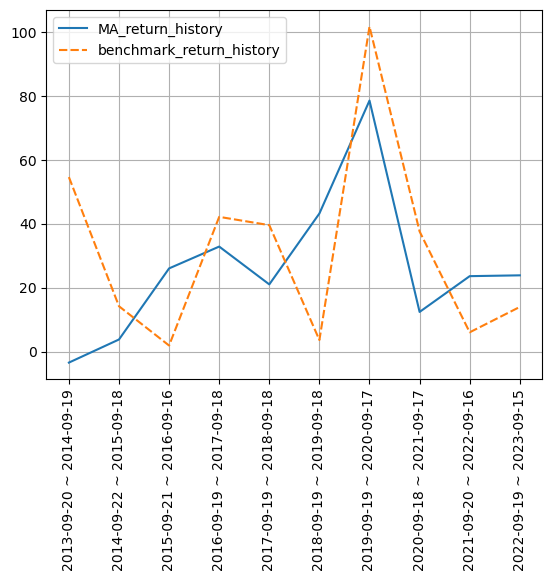

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(return_history,benchmark_return_history), columns = ['MA_return_history', 'benchmark_return_history'], index=idx)
sns.lineplot(df)
plt.xticks(rotation=90)
plt.grid()


In [4]:
sum(return_history) / len(return_history)

26.18660829064178

In [5]:
pf[strategy].stats()

Start                         2022-09-19 04:00:00+00:00
End                           2023-09-15 04:00:00+00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                  12385.579633
Total Return [%]                              23.855796
Benchmark Return [%]                          13.961832
Max Gross Exposure [%]                        99.831327
Total Fees Paid                               131.88663
Max Drawdown [%]                              16.282868
Max Drawdown Duration                  65 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   6
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                       50.0
Best Trade [%]                                24.589437
Worst Trade [%]                               -6